In [25]:
import torch
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
# import imageio
import imageio.v2 as imageio

In [3]:
# Load the file
pt_file = torch.load("save_model/convlstm_results_single5.pt")

# Print the head of the file
unet_loss_curve = pt_file['loss_curve']

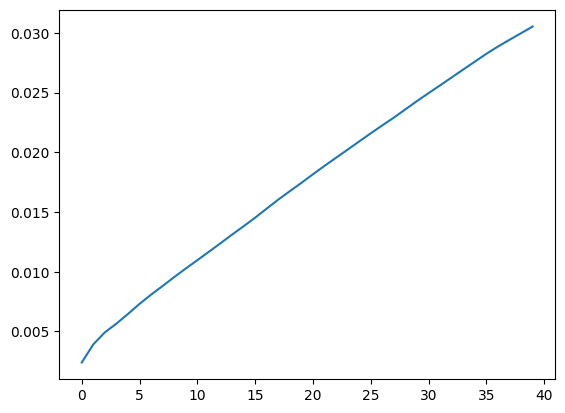

In [4]:
plt.plot(unet_loss_curve)


In [5]:
pt_file['trues'].shape

(20, 40, 1, 300, 300)

In [8]:
mae={}
for i in range(20):
    trues = pt_file['trues'][i][0]
    preds = pt_file['preds'][i][0][0]
    mae[i] = abs(trues - preds).mean()
    print(mae[i])
    

0.0021527465
0.0019931435
0.0023175506
0.0022534903
0.0023586187
0.0022035986
0.0018338073
0.00244297
0.002915185
0.0029310593
0.0019244079
0.0022973337
0.002209827
0.0024353184
0.0026186402
0.002212097
0.001849988
0.00234835
0.0020134
0.0026497


In [9]:
trues.shape

(1, 300, 300)

In [10]:
preds.shape

(300, 300)

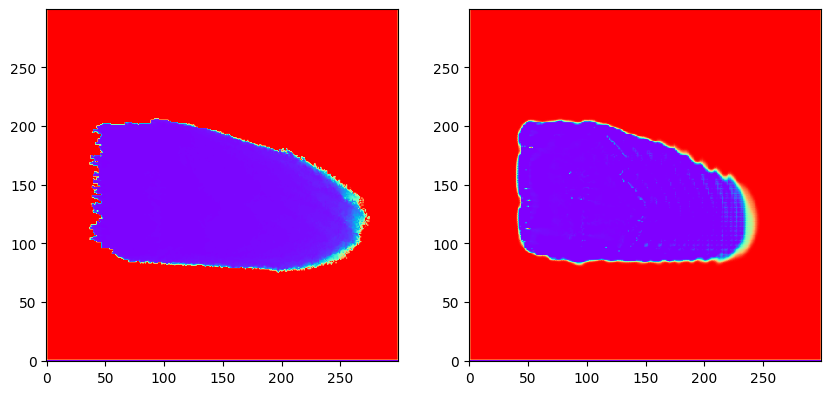

In [23]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
filenames = []
for i in range(40):
    true = pt_file['trues'][0][i][0]
    pred = pt_file['preds'][0][i][0]
    axs[0].imshow(true,cmap='rainbow',origin="lower")
    axs[1].imshow(pred,cmap='rainbow',origin="lower")
    plt.savefig(f'pics/{i}.png')
    filenames.append(f'pics/{i}.png')

In [26]:
# make animation
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('pics/movie.gif', images)